In [ ]:
from google.colab import files

uploaded = files.upload()

Saving FullSizeRender.JPG to FullSizeRender.JPG


In [ ]:
!unzip saved_model.zip

Archive:  saved_model.zip
   creating: content/inference_graph/saved_model/
   creating: content/inference_graph/saved_model/variables/
  inflating: content/inference_graph/saved_model/variables/variables.index  
  inflating: content/inference_graph/saved_model/variables/variables.data-00000-of-00001  
  inflating: content/inference_graph/saved_model/saved_model.pb  
   creating: content/inference_graph/saved_model/assets/


In [ ]:
!git clone https://github.com/tensorflow/models.git
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

Cloning into 'models'...
remote: Enumerating objects: 56610, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 56610 (delta 119), reused 102 (delta 3), pack-reused 56385
Receiving objects: 100% (56610/56610), 572.42 MiB | 29.41 MiB/s, done.
Resolving deltas: 100% (39069/39069), done.
/content/models/research
Processing /content/models/research
     |████████████████████████████████| 9.6MB 11.2MB/s 
     |████████████████████████████████| 358kB 42.0MB/s 
     |████████████████████████████████| 1.1MB 44.6MB/s 
     |████████████████████████████████| 153kB 55.9MB/s 
     |████████████████████████████████| 829kB 36.7MB/s 
     |████████████████████████████████| 2.3MB 45.1MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 706kB 28.5MB/s 
     |████████████████████████████████| 102kB 8.6MB/s 
     |████████████████████████████████| 645kB 37.1MB/s 
     |██████████████████████

### Getting the data

In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 4.3MB/s 
     |████████████████████████████████| 4.2MB 13.2MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 112kB 45.0MB/s 
     |████████████████████████████████| 143kB 44.3MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-r0t43csy/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-r0t43csy/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-34vjicfd/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'milesfranklin'
os.environ['KAGGLE_KEY'] = 'cb99db5df355a0fe8ae88193a7ef1836'

In [ ]:
%%bash
mkdir /content/dataset
cd /content/dataset
kaggle datasets download -d milesfranklin/my-face-detection --unzip

100%|##########| 6.92M/6.92M [00:00<00:00, 33.8MB/s]


## Move gerenate_tf_record.py and labelmap.pbtxt to /content

In [ ]:
import os
import shutil

# Not sure why, but CWD is /content/models/research
# print(os.getcwd())

# os.chdir("../../content")
# print(os.getcwd())

files = ["labelmap.pbtxt", "generate_tf_records.py"]

for f in files:
    try:
        src = os.path.join("..", "..", "dataset", f)
        dst = os.path.join("..", "..", f)
        shutil.move(src, dst)
        print(f"Successfully moved {f} to /content")
    except Exception:
        print(f"{f} in not in /dataset")

Successfully moved labelmap.pbtxt to /content
Successfully moved generate_tf_records.py to /content


##### Converting data to TFRecord
The dataset contains two files `train_labels.csv` and `test_labels.csv` which need to be converted into TFRecord format so that it can be fed into Tensorflow’s 2 Object Detection API.

In [ ]:
%cd /content

/content


In [ ]:
# !wget https://raw.githubusercontent.com/hugozanini/object-detection/master/generate_tf_record.py

In [ ]:
!python generate_tf_records.py -l labelmap.txt -o dataset/train.record -i dataset/images -csv dataset/train_labels.csv
!python generate_tf_records.py -l labelmap.txt -o dataset/test.record -i dataset/images -csv dataset/test_labels.csv

2021-04-28 22:23:26.692838: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
INFO:Successfully created the TFRecords: dataset/train.record
2021-04-28 22:23:29.635691: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
INFO:Successfully created the TFRecords: dataset/test.record


---

###  Testing the trained model

Based on [Object Detection API Demo](https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/object_detection_tutorial.ipynb) and [Inference from saved model tf2 colab](https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/inference_from_saved_model_tf2_colab.ipynb).

In [ ]:
!wget https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
from inferenceutils import *

--2021-04-28 22:23:32--  https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2219 (2.2K) [text/plain]
Saving to: ‘inferenceutils.py’

inferenceutils.py   100%[===================>]   2.17K  --.-KB/s    in 0s      

2021-04-28 22:23:32 (13.2 MB/s) - ‘inferenceutils.py’ saved [2219/2219]



##### Loading the model

In [ ]:
output_directory = 'inference_graph/'

In [ ]:
labelmap_path = "labelmap.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/content/content/{output_directory}/saved_model')

##### Selecting the images to test

In [ ]:
import pandas as pd
test = pd.read_csv('dataset/test_labels.csv')
images = list(test['filename'])

##### Doing inference

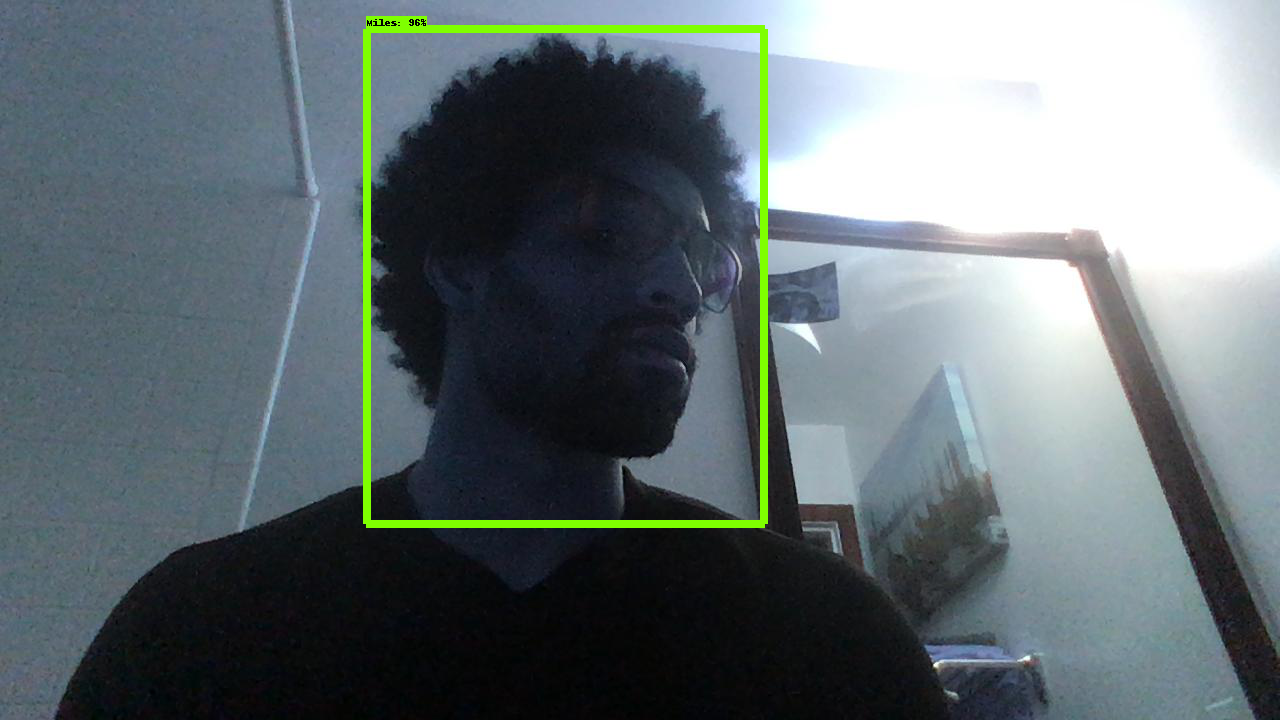

(720, 1280, 3)


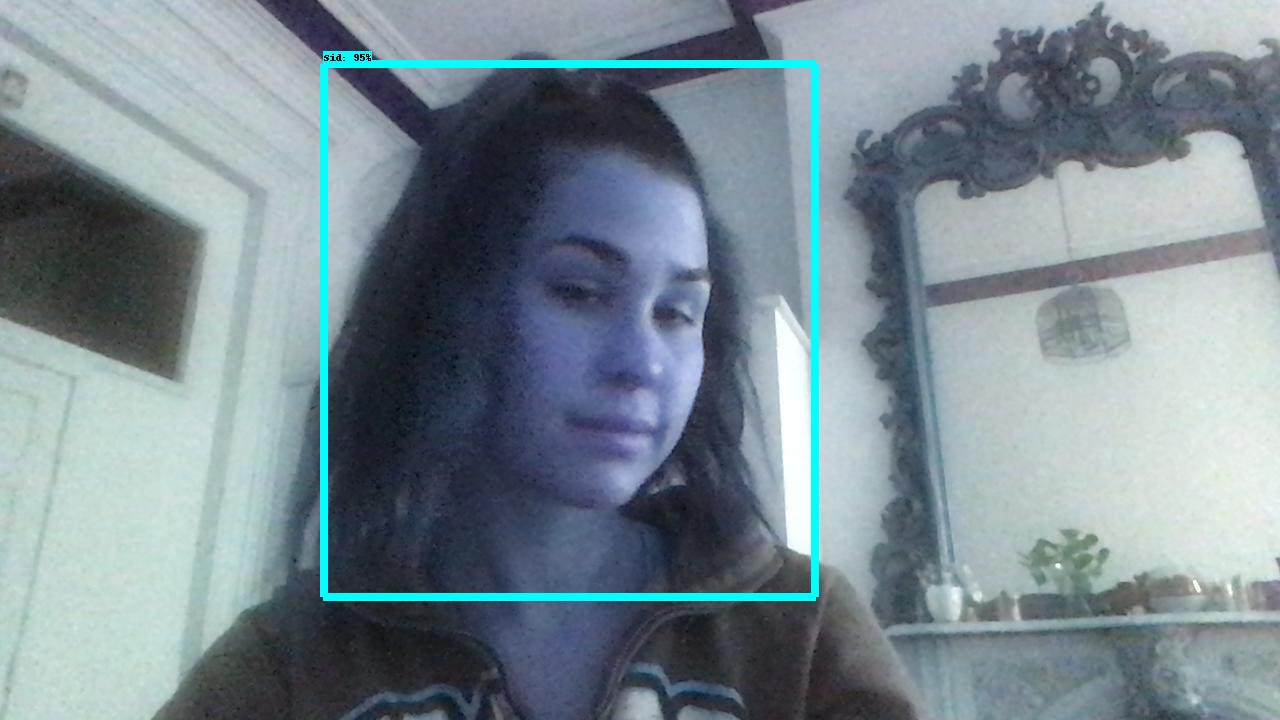

(720, 1280, 3)


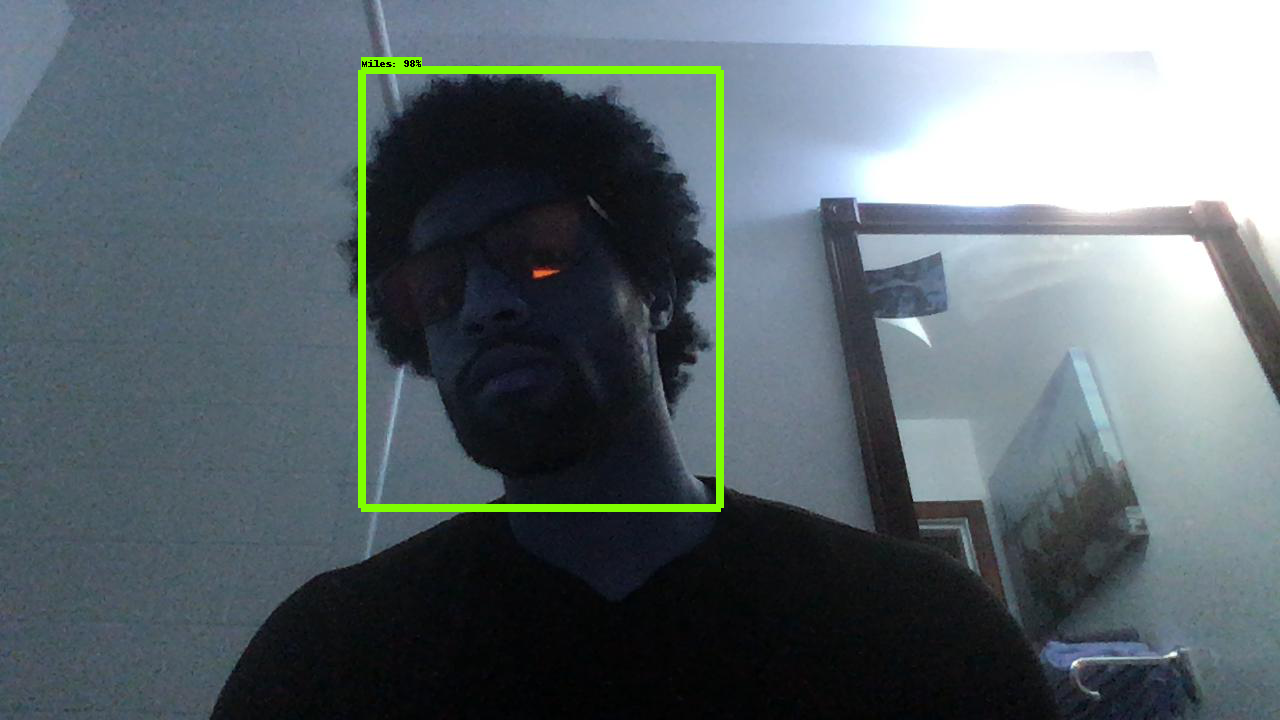

(720, 1280, 3)


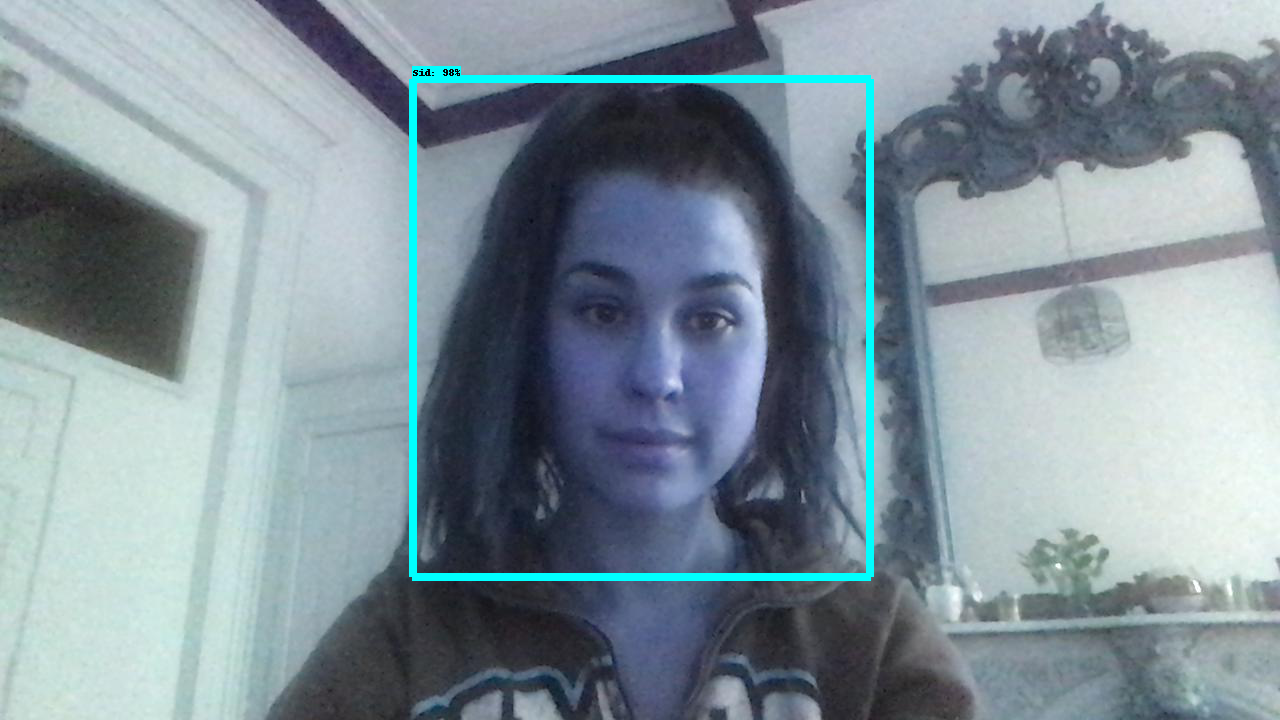

(720, 1280, 3)


In [ ]:
import random

# images = ['canguru-1.jpeg', 'canguru-2.jpeg', 'canguru-3.jpeg']
# images = ["Miles_0.jpeg", "Miles_1.jpeg", "Miles_10.jpeg",
#           "Sid_0.jpeg", "Sid_1.jpeg", "Sid_10.jpeg",]

random.seed(0)
for image_name in random.sample(images, 4):
  
  image_np = load_image_into_numpy_array('dataset/images/' + image_name)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))
  print(image_np.shape)

<IPython.core.display.Javascript object>

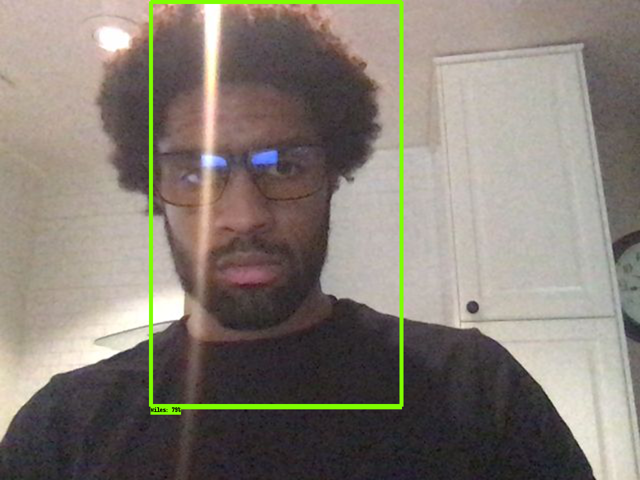

(720, 1280, 3)


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js, clear
from base64 import b64decode
import time

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
    //   const capture = document.createElement('button');
    //   capture.textContent = 'Capture';
    //   div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      //video.width=1280
      //video.height=720
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // google.colab.output.setIframeWidth(1280, true);
      // google.colab.output.setIframeHeight(720, true);
      
      // Wait for Capture to be clicked.
      //await new Promise((resolve) => capture.onclick = resolve);

      let promise = new Promise((resolve, reject) => {
          setTimeout(() => resolve("done!"), 125)
          });
      let result = await promise; 

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# from IPython.display import Image
from PIL import Image

while True:
    filename = take_photo()
    image_np = load_image_into_numpy_array(filename)
    image_np = np.array(Image.fromarray(image_np).resize((1280,720))) # reseize for model
    
    output_dict = run_inference_for_single_image(model, image_np)
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks_reframed', None),
        use_normalized_coordinates=True,
        line_thickness=8)
    display(Image.fromarray(image_np).resize((640,480))) # resize for clean output
    # print(image_np.shape)

    break
    time.sleep(1)
    clear(wait=True)

1    58
2    42
dtype: int64

In [ ]:
print(output_dict["num_detections"])
print(output_dict["detection_classes"])

100
[1 2 1 2 1 1 2 1 1 1 2 2 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 2 2 1 2 1 1 1 1 1 2
 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 2 2 1 1 1 1 2 1 2 2 2 1 2 2 1 2 1 2 1 2 1 1]


dataset/images/Sid_126.jpeg


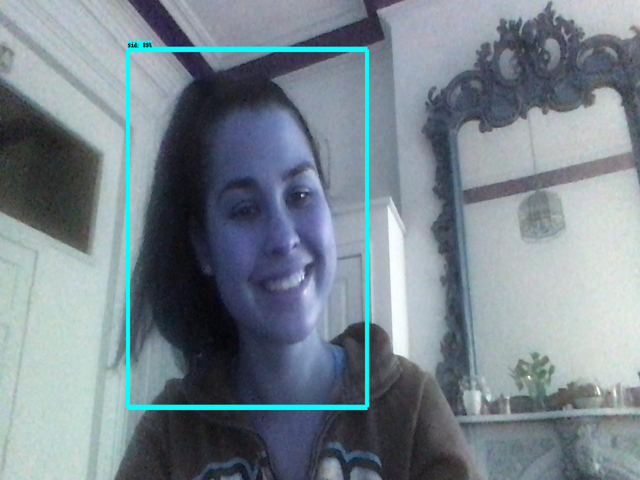

Sid:	3


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js, clear
from base64 import b64decode
import time

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
    //   const capture = document.createElement('button');
    //   capture.textContent = 'Capture';
    //   div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      //video.width=1280
      //video.height=720
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // google.colab.output.setIframeWidth(1280, true);
      // google.colab.output.setIframeHeight(720, true);
      
      // Wait for Capture to be clicked.
      //await new Promise((resolve) => capture.onclick = resolve);

      let promise = new Promise((resolve, reject) => {
          setTimeout(() => resolve("done!"), 125)
          });
      let result = await promise; 

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# from IPython.display import Image
from PIL import Image

def get_class_prediction(classes, category_index):
    # Sorry, This is needlessly complex...
    index = pd.Index(classes)
    val_counts = pd.DataFrame(index.value_counts())
    index = val_counts[val_counts[0]==index.value_counts().max()].index[0]
    class_name = category_index[index]["name"]

    return class_name

test = pd.read_csv('dataset/test_labels.csv')
images = list(test['filename'])

miles = [i for i in images if "Miles" in i]
sid = [i for i in images if "Sid" in i]

images = random.sample(miles, 6) + random.sample(sid, 3) + \
         random.sample(miles, 6) + random.sample(sid, 3)
# random.shuffle(images)

count = 0
most_recent = ""
# while True:
for f in images:
    
    # filename = take_photo()
    file_name = os.path.join("dataset", "images", f)
    print(file_name)
    image_np = load_image_into_numpy_array(file_name)
    image_np = np.array(Image.fromarray(image_np).resize((1280,720))) # reseize for model
    
    output_dict = run_inference_for_single_image(model, image_np)
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks_reframed', None),
        use_normalized_coordinates=True,
        line_thickness=8)
    display(Image.fromarray(image_np).resize((640,480))) # resize for clean output
    # print(image_np.shape)

    pred_class = get_class_prediction(output_dict['detection_classes'], category_index)

    if most_recent == pred_class:
        count += 1
    else:
        most_recent = pred_class
        count = 1

    app = "Safari"
    if most_recent == "Miles":
        if count == 3:
            path = f"/Applications/{app}.app"
            os.system(f"open {path}") # Works  
    if most_recent == "Sid":
        os.system(f"killall {app}")

    print(f"{pred_class}:\t{count}")

    time.sleep(1.5)
    clear(wait=True)

In [ ]:

display(index.value_counts())
val_counts = pd.DataFrame(index.value_counts())
val_counts[val_counts[0]==index.value_counts().max()].index[0]

1    61
2    39
dtype: int64

1

In [ ]:
category_index

{1: {'id': 1, 'name': 'Miles'}, 2: {'id': 2, 'name': 'Sid'}}